Extract mel-spectrogram from audio

In [1]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt


Find graphic specs

In [2]:
def load_data(dir_path):
   X = []
   y = []
   labels = ['PD', 'HC']
   for label in labels:
      path = os.path.join(dir_path, label)
      class_num = labels.index(label)
      for img in os.listdir(path):
         try:
               img_arr = img_to_array(load_img(os.path.join(path, img), target_size=(640, 480)))  # Convert image to array
               X.append(preprocess_input(img_arr))  # Preprocess the image using VGG16's preprocess_input method
               y.append(class_num)
         except Exception as e:
               print(e)
      try:
            return np.array(X), np.array(y)
      except Exception as e:
            print(f'Failed to create numpy arrays: {e}')
            return None, None

In [3]:
# Load the data
images, labels = load_data('./plots/')

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

train

In [4]:
def create_model():
    model = Sequential()
    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.layers[0].trainable = False
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model

In [5]:
# Create the model
model = create_model()

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(test_images, test_labels)


94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 0.3492 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2022 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.2183 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1207 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.1356 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0730 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.0853 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0453 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000

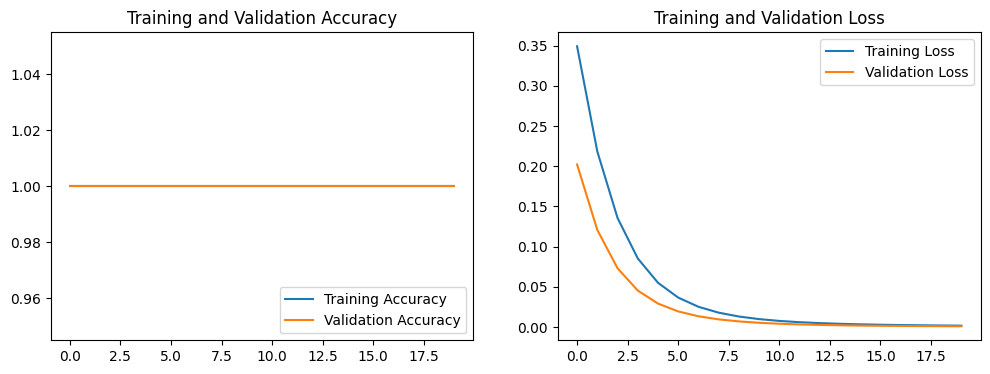

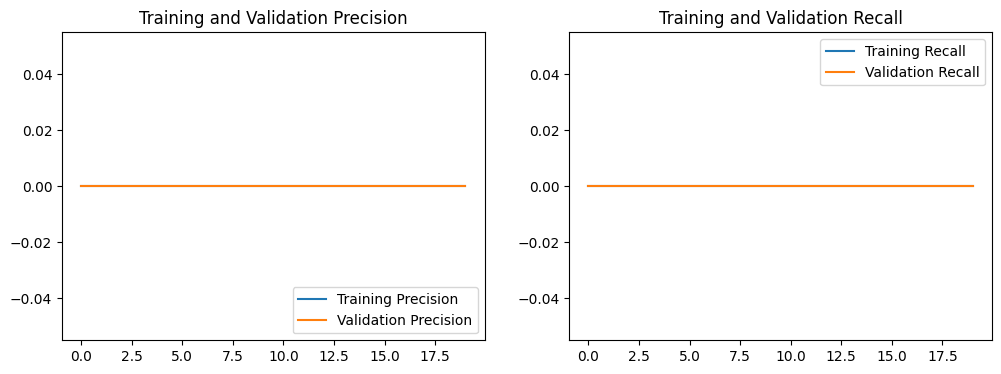

In [6]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Plot Precision
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation Precision')

# Plot Recall
plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.legend(loc='upper right')
plt.title('Training and Validation Recall')
plt.show()